This BRATS Slice Rotation Model is based on Laurence Moroney (2021) Rock Paper Scissors Classification Model. Available at: https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/rock_paper_scissors_cnn/rock_paper_scissors_cnn.ipynb [Last Accessed 30 June 2021]

In [ ]:
# upload dataset here (deprecated for full dataset- using google drive mounting method)
# from google.colab import files
# datasetfile = files.upload()

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import nibabel and os module for image formatting and file management
import nibabel as nib
import os

from scipy import ndimage

# lists to store slices
brainList0 = [] # 0 degrees
brainList90 = [] # 90 degrees
brainList180 = [] # 180 degrees
brainList270 = [] # 270 degrees

# place slices into lists
def store_img(file):
  bratsImg = nib.load(file)
  bratsImgData = bratsImg.get_fdata()

  i = 100
  while i < 130:
    # rotate images to 0 degrees + store in list A
    rotatedImg = ndimage.rotate(bratsImgData[i,:,:], 90, mode = 'mirror')
    brainList0.append(rotatedImg.copy())
    rotatedImg = ndimage.rotate(bratsImgData[:,i,:], 90, mode = 'mirror')
    brainList0.append(rotatedImg.copy())
    rotatedImg = ndimage.rotate(bratsImgData[:,:,i], 90, mode = 'mirror')
    brainList0.append(rotatedImg.copy())

    # rotate images to 90 degrees + store in list B
    rotatedImg = bratsImgData[i,:,:]
    brainList90.append(rotatedImg.copy())
    rotatedImg = bratsImgData[:,i,:]
    brainList90.append(rotatedImg.copy())
    rotatedImg = bratsImgData[:,:,i]
    brainList90.append(rotatedImg.copy())

    # rotate images to 180 degrees + store in list C
    rotatedImg = ndimage.rotate(bratsImgData[i,:,:], 270, mode = 'mirror')
    brainList180.append(rotatedImg.copy())
    rotatedImg = ndimage.rotate(bratsImgData[:,i,:], 270, mode = 'mirror')
    brainList180.append(rotatedImg.copy())
    rotatedImg = ndimage.rotate(bratsImgData[:,:,i], 270, mode = 'mirror')
    brainList180.append(rotatedImg.copy())

    # rotate images to 270 degrees + store in list D
    rotatedImg = ndimage.rotate(bratsImgData[i,:,:], 180, mode = 'mirror')
    brainList270.append(rotatedImg.copy())
    rotatedImg = ndimage.rotate(bratsImgData[:,i,:], 180, mode = 'mirror')
    brainList270.append(rotatedImg.copy())
    rotatedImg = ndimage.rotate(bratsImgData[:,:,i], 180, mode = 'mirror')
    brainList270.append(rotatedImg.copy())

    i += 1

count = 0
# extract flair files from BRATS HGG + LGG data folders
dirHGG = '/content/drive/MyDrive/URVOS/Brats_2018_data.zip (Unzipped Files)/Brats_2018 data/HGG/'
for folder in os.listdir(dirHGG):
  for file in os.listdir(dirHGG + folder + '/'):
    if count < 20:
      if file.endswith("flair.nii.gz"):
        store_img(dirHGG + folder + '/' + file)
        count += 1

#dirLGG = '/content/drive/MyDrive/URVOS/Brats_2018_data.zip (Unzipped Files)/Brats_2018 data/LGG/'
#for folder in os.listdir(dirLGG):
#  for file in os.listdir(dirLGG + folder + '/'):
#    if file.endswith("flair.nii.gz"):
#      store_img(dirLGG + folder + '/' + file)

#store_img('/content/drive/MyDrive/URVOS/Brats_2018_data.zip (Unzipped Files)/Brats_2018 data/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii.gz')

Total images: 7200

0 deg Images:


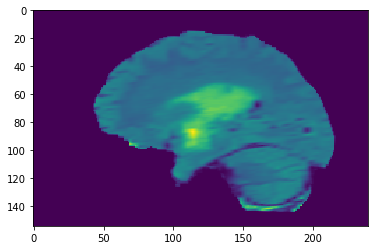

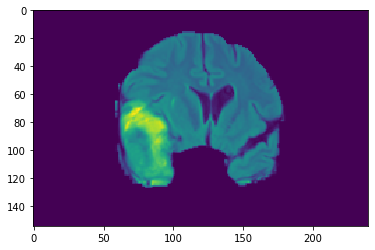

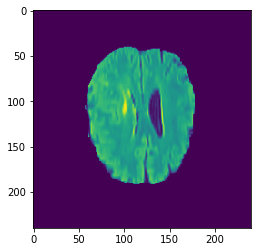

90 deg Images:


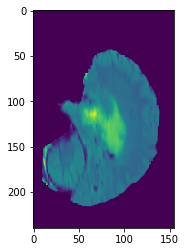

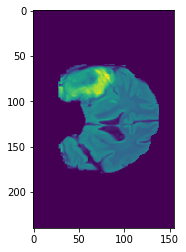

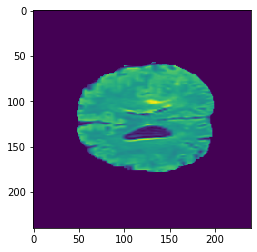

180 deg Images:


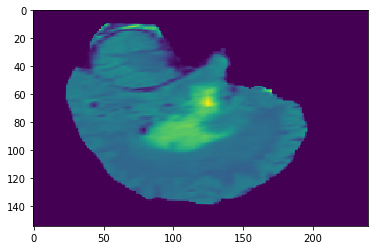

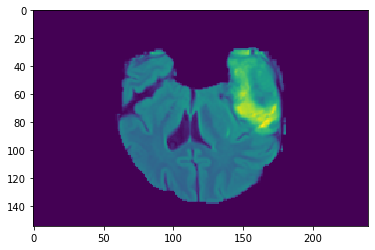

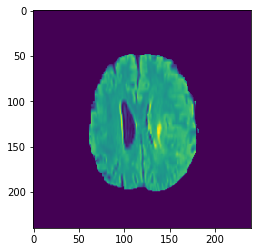

270 deg Images:


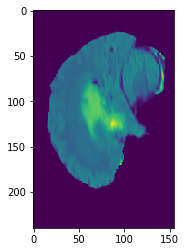

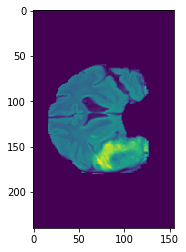

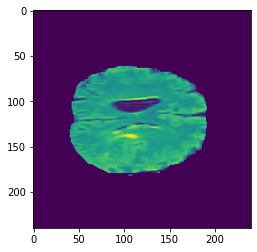

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

# show first 3 images in image lists
print("Total images: " + str(len(brainList0) + len(brainList90) + len(brainList180) + len(brainList270)) + "\n")

def show_imgs(sliceList):
  for i in range(3):
    plt.imshow(sliceList[i], interpolation='nearest')
    plt.show()

print("0 deg Images:")
show_imgs(brainList0)

print("90 deg Images:")
show_imgs(brainList90)

print("180 deg Images:")
show_imgs(brainList180)

print("270 deg Images:")
show_imgs(brainList270)

In [ ]:
mainDir = '/content/gdrive/bratsClassification'

# create 4 classes (0, 90, 180, 270)
trainClasses = ['0', '90', '180', '270']
testClasses = ['test0', 'test90', 'test180', 'test270']
# out of sample
oosClasses = ['oos0', 'oos90', 'oos180', 'oos270']

# training directories
for trainClass in trainClasses:
  if not os.path.exists(mainDir + '/train/' + trainClass):
    os.makedirs(mainDir + '/train/' + trainClass)

# validation directories
for testClass in testClasses:
  if not os.path.exists(mainDir + '/test/' + testClass):
    os.makedirs(mainDir + '/test/' + testClass)

# out of sample test directory
for oosClass in oosClasses:
  if not os.path.exists(mainDir + '/oos/' + oosClass):
    os.makedirs(mainDir + '/oos/' + oosClass)

In [ ]:
# assigning directory path
myPath = os.path.abspath(mainDir)

# copying to directories
def list_to_dir(sliceType, sliceList):
  count = 1
  for slices in sliceList:
    listLength = len(sliceList)
    if count <= (listLength * 0.7): 
      # add to train
      plt.imsave(myPath + '/train/' + sliceType + '/' + sliceType[0:3] + 'Slice' + str(count) + '.png', slices)
    elif count <= (listLength * 0.9): 
      # add to test
      plt.imsave(myPath + '/test/test' + sliceType.capitalize() + '/test' + sliceType[0:3].capitalize() + 'Slice' + str(count) + '.png', slices)
    else: 
      # else add to out of sample
      plt.imsave(myPath + '/oos/oos' + sliceType.capitalize() + '/oos' + sliceType[0:3].capitalize() + 'Slice' + str(count) + '.png', slices)

    count+=1

list_to_dir("0", brainList0)
list_to_dir("90", brainList90)
list_to_dir("180", brainList180)
list_to_dir("270", brainList270)

In [ ]:
#Counting images in folders
print("Number of Out of Sample Test class images")
print(len(os.listdir('/content/gdrive/bratsClassification/oos/oos0')))
print(len(os.listdir('/content/gdrive/bratsClassification/oos/oos180')))
print(len(os.listdir('/content/gdrive/bratsClassification/oos/oos270')))
print(len(os.listdir('/content/gdrive/bratsClassification/oos/oos90')))
tOos = len(os.listdir('/content/gdrive/bratsClassification/oos/oos0')) + len(os.listdir('/content/gdrive/bratsClassification/oos/oos180')) + len(os.listdir('/content/gdrive/bratsClassification/oos/oos270')) + len(os.listdir('/content/gdrive/bratsClassification/oos/oos90'))
print("Total out-of-sample images:"+ str(tOos) + '\n')

print("Number of Test class images")
print(len(os.listdir('/content/gdrive/bratsClassification/test/test0')))
print(len(os.listdir('/content/gdrive/bratsClassification/test/test180')))
print(len(os.listdir('/content/gdrive/bratsClassification/test/test270')))
print(len(os.listdir('/content/gdrive/bratsClassification/test/test90')))
tTest = len(os.listdir('/content/gdrive/bratsClassification/test/test0')) + len(os.listdir('/content/gdrive/bratsClassification/test/test180')) + len(os.listdir('/content/gdrive/bratsClassification/test/test270')) + len(os.listdir('/content/gdrive/bratsClassification/test/test90'))
print("Total test images:"+ str(tTest) + '\n')

print("Number of Training class images")
print(len(os.listdir('/content/gdrive/bratsClassification/train/0')))
print(len(os.listdir('/content/gdrive/bratsClassification/train/180')))
print(len(os.listdir('/content/gdrive/bratsClassification/train/270')))
print(len(os.listdir('/content/gdrive/bratsClassification/train/90')))
tTrain = len(os.listdir('/content/gdrive/bratsClassification/train/0')) + len(os.listdir('/content/gdrive/bratsClassification/train/180')) + len(os.listdir('/content/gdrive/bratsClassification/train/270')) + len(os.listdir('/content/gdrive/bratsClassification/train/90'))
print("Total train images:"+ str(tTrain) + '\n')

Number of Out of Sample Test class images
180
180
180
180
Total out-of-sample images:720

Number of Test class images
360
360
360
360
Total test images:1440

Number of Training class images
1260
1260
1260
1260
Total train images:5040



In [ ]:
#callback for 98% accuracy
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

#Define imageDataGenerators and Model
TRAINING_DIR = '/content/gdrive/bratsClassification/train/'
training_datagen = ImageDataGenerator(
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest'
)

VALIDATION_DIR = "/content/gdrive/bratsClassification/test/"
validation_datagen=ImageDataGenerator()#rescale=1./240

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(240,240),
    class_mode='categorical',
    batch_size=30
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(240,240),
    class_mode='categorical',
    batch_size=30
)

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics='acc')

Found 5040 images belonging to 4 classes.
Found 1440 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
______________________________________

In [ ]:
#Train model
history = model.fit(train_generator,
                    epochs=30,
                    steps_per_epoch=168,
                    validation_data=validation_generator,
                    verbose = 1,
                    validation_steps=12,
                    callbacks=[callbacks])

model.save("bratsRotationClassification.h5")

Epoch 1/30
168/168 [==============================] - 69s 412ms/step - loss: 1.5496 - acc: 0.2651 - val_loss: 1.3862 - val_acc: 0.2417
Epoch 2/30
168/168 [==============================] - 69s 410ms/step - loss: 1.6551 - acc: 0.2438 - val_loss: 1.3861 - val_acc: 0.2556
Epoch 3/30
168/168 [==============================] - 69s 413ms/step - loss: 1.3865 - acc: 0.2458 - val_loss: 1.3868 - val_acc: 0.2056
Epoch 4/30
168/168 [==============================] - 69s 411ms/step - loss: 1.3865 - acc: 0.2403 - val_loss: 1.3863 - val_acc: 0.2417
Epoch 5/30
168/168 [==============================] - 69s 411ms/step - loss: 1.6919 - acc: 0.2573 - val_loss: 1.3435 - val_acc: 0.4222
Epoch 6/30
168/168 [==============================] - 69s 410ms/step - loss: 1.2148 - acc: 0.4891 - val_loss: 0.6547 - val_acc: 0.7500
Epoch 7/30
168/168 [==============================] - 69s 409ms/step - loss: 0.6227 - acc: 0.7591 - val_loss: 0.3715 - val_acc: 0.8278
Epoch 8/30
168/168 [==============================] - 6

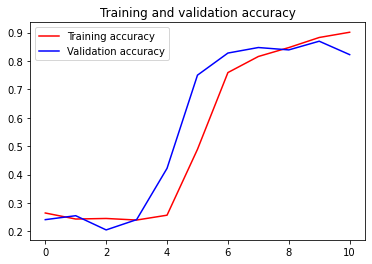

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

{0: '0', 1: '180', 2: '270', 3: '90'}
Predictions: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '270', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '90', '0', '0', '0', '0', '0', '0', '0', '0', '0', '270', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '90', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '180', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '90', '90', '90', '90', '90', '90', '90'

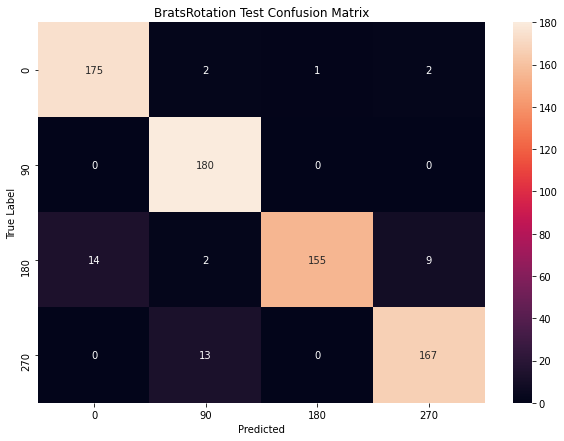

In [ ]:
import numpy as np
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

classesDict = {v: k for k, v in train_generator.class_indices.items()} #shows values of classes as a dictionary,flipped such that {angle:index}
#Testing Out of Sample directory Images

angleTruth = [] #holds real values of the angle
anglePrediction = [] #holds values of predictions
folder_path = '/content/gdrive/bratsClassification/oos/oos'


def predictArray(folder_path,angle):
  folder_path += angle
  for img in os.listdir(folder_path):
      img = os.path.join(folder_path, img)
      img = image.load_img(img, target_size=(240, 240))
      img = image.img_to_array(img)
      img = np.expand_dims(img, axis=0)
      
      angleTruth.append(angle)#add true angle to array (assumes all data in out-of-sample path is same angle class)
      images = np.vstack([img])
      classes = model.predict(images, batch_size=1)
      #print("\n(0/180/270/90)")
      classes = np.transpose(classes)
      classes = classes.reshape((4,))#turns to 1d array of predictions
      classes = np.argmax(classes)#gets most possible class
      classes = classesDict.get(classes)#get angle from index
      anglePrediction.append(classes)#adds to prediction array

#add truths to array (assumes all data in out-of-sample path is same angle class)
#for i in range(0,len(anglePrediction)):
#  angleTruth.append(angle)

print(classesDict)
predictArray(folder_path,'0')
predictArray(folder_path,'90')
predictArray(folder_path,'180')
predictArray(folder_path,'270')
print("Predictions:",anglePrediction) # array of predicted classes
print("Actual Angle:",angleTruth) # array of truths, made from repeatedly adding chosen angle to an array

#confusion matrix
labels = ["0", "90", "180", "270"]
the_matrix = confusion_matrix(angleTruth, anglePrediction, labels=labels)
print(the_matrix)

df_cfm = pd.DataFrame(the_matrix, index = labels, columns = labels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title('BratsRotation Test Confusion Matrix')
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')
cfm_plot.figure.savefig("cfm.png")

In [ ]:
#test out-of-sample images by SEPERATE UPLOAD
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

def find_class(classes):
  maxValue = np.amax(classes)
  index = np.where(classes == np.amax(classes))
  result = ''
  if index[1] == 0:
    result = "0"
  elif index[1] == 1:
    result = "90"
  elif index[1] == 2:
    result = "180"
  else:
    result = "270"
  print("Predicted class: ", result)
  print("Prediction value: ", maxValue)

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size = (240,240))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=1)
  print(fn)
  print("\n(0 / 90 / 180 / 270)")
  print(classes)

  find_class(classes)